In [2]:
import os
import sys
import numpy as np
import pandas as pd
import bson
import cv2
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns

In [3]:
INPUT_PATH = os.path.join('.', 'data')
CATEGORY_NAMES_DF = pd.read_csv(os.path.join(INPUT_PATH, 'category_names.csv'))
TRAIN_DB = bson.decode_file_iter(open(os.path.join(INPUT_PATH, 'train.bson'), 'rb'))
TEST_DB = bson.decode_file_iter(open(os.path.join(INPUT_PATH, 'test.bson'), 'rb'))

### First images in train and test datasets

In [4]:
for item in TRAIN_DB:
    break
print(type(item), list(item.keys()))
print(item['_id'], len(item['imgs']), item['category_id'])

<class 'dict'> ['imgs', 'category_id', '_id']
0 1 1000010653


In [5]:
def decode(data):
    arr = np.asarray(bytearray(data), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import io
from PIL import Image

def decode_pil(data):
    return Image.open(io.BytestIO(data))

for img_dict in item['imgs']:
    img = decode(img_dict['picture'])
    plt.figure()
    plt.imshow(img)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


#### 

In [6]:
CATEGORY_NAMES_DF

category_id              category_level1  \
0      1000021794        ABONNEMENT / SERVICES   
1      1000012764  AMENAGEMENT URBAIN - VOIRIE   
2      1000012776  AMENAGEMENT URBAIN - VOIRIE   
3      1000012768  AMENAGEMENT URBAIN - VOIRIE   
4      1000012755  AMENAGEMENT URBAIN - VOIRIE   
5      1000012738  AMENAGEMENT URBAIN - VOIRIE   
6      1000012732  AMENAGEMENT URBAIN - VOIRIE   
7      1000013163  AMENAGEMENT URBAIN - VOIRIE   
8      1000012712  AMENAGEMENT URBAIN - VOIRIE   
9      1000012718  AMENAGEMENT URBAIN - VOIRIE   
10     1000016200                   ANIMALERIE   
11     1000016202                   ANIMALERIE   
12     1000016204                   ANIMALERIE   
13     1000016210                   ANIMALERIE   
14     1000021524                   ANIMALERIE   
15     1000016212                   ANIMALERIE   
16     1000016220                   ANIMALERIE   
17     1000016206                   ANIMALERIE   
18     1000016214                   ANIMALERIE   
19     1000016216                   ANIMALERIE   
20     1000016222                   ANIMALERIE   
21     1000016226                   ANIMALERIE   
22     1000016228                   ANIMALERIE   
23     1000016230                   ANIMALERIE   
24     1000016232                   ANIMALERIE   
25     1000016234                   ANIMALERIE   
26     1000016236                   ANIMALERIE   
27     1000016238                   ANIMALERIE   
28     1000016240                   ANIMALERIE   
29     1000016224                   ANIMALERIE   
...           ...                          ...   
5240   1000003524      VIN - ALCOOL - LIQUIDES   
5241   1000003462      VIN - ALCOOL - LIQUIDES   
5242   1000003443      VIN - ALCOOL - LIQUIDES   
5243   1000003447      VIN - ALCOOL - LIQUIDES   
5244   1000003441      VIN - ALCOOL - LIQUIDES   
5245   1000003439      VIN - ALCOOL - LIQUIDES   
5246   1000003437      VIN - ALCOOL - LIQUIDES   
5247   1000003452      VIN - ALCOOL - LIQUIDES   
5248   1000003454      VIN - ALCOOL - LIQUIDES   
5249   1000003456      VIN - ALCOOL - LIQUIDES   
5250   1000003460      VIN - ALCOOL - LIQUIDES   
5251   1000003427      VIN - ALCOOL - LIQUIDES   
5252   1000003429      VIN - ALCOOL - LIQUIDES   
5253   1000022247      VIN - ALCOOL - LIQUIDES   
5254   1000003407      VIN - ALCOOL - LIQUIDES   
5255   1000003409      VIN - ALCOOL - LIQUIDES   
5256   1000012938      VIN - ALCOOL - LIQUIDES   
5257   1000012936      VIN - ALCOOL - LIQUIDES   
5258   1000003434      VIN - ALCOOL - LIQUIDES   
5259   1000003432      VIN - ALCOOL - LIQUIDES   
5260   1000003528      VIN - ALCOOL - LIQUIDES   
5261   1000003424      VIN - ALCOOL - LIQUIDES   
5262   1000003414      VIN - ALCOOL - LIQUIDES   
5263   1000003416      VIN - ALCOOL - LIQUIDES   
5264   1000003420      VIN - ALCOOL - LIQUIDES   
5265   1000003412      VIN - ALCOOL - LIQUIDES   
5266   1000003530      VIN - ALCOOL - LIQUIDES   
5267   1000003402      VIN - ALCOOL - LIQUIDES   
5268   1000003404      VIN - ALCOOL - LIQUIDES   
5269   1000003400      VIN - ALCOOL - LIQUIDES   

                       category_level2  \
0                       CARTE PREPAYEE   
1                   AMENAGEMENT URBAIN   
2                   AMENAGEMENT URBAIN   
3                   AMENAGEMENT URBAIN   
4                         SIGNALETIQUE   
5               SIGNALISATION ROUTIERE   
6               SIGNALISATION ROUTIERE   
7               SIGNALISATION ROUTIERE   
8                               VOIRIE   
9                               VOIRIE   
10               ACCESSOIRE POUR REPAS   
11               ACCESSOIRE POUR REPAS   
12               ACCESSOIRE POUR REPAS   
13               ACCESSOIRE POUR REPAS   
14               ACCESSOIRE POUR REPAS   
15               ACCESSOIRE POUR REPAS   
16               ACCESSOIRE POUR REPAS   
17               ACCESSOIRE POUR REPAS   
18               ACCESSOIRE POUR REPAS   
19               ACCESSOIRE POUR REPAS   
20               ACCESS

In [7]:
level_tags = CATEGORY_NAMES_DF.columns[1:]


### More images

In [8]:
def decode_images(item_imgs):
    nx = 2 if len(item_imgs) > 1 else 1
    ny = 2 if len(item_imgs) > 2 else 1
    composed_img = np.zeros((ny * 180, nx * 180, 3), dtype=np.uint8)
    for i, img_dict in enumerate(item_imgs):
        img = decode(img_dict['picture'])
        h, w, _ = img.shape
        xstart = (i % nx) * 180
        xend = xstart + w
        ystart = (i // nx) * 180
        yend = ystart + h
        composed_img[ystart:yend, xstart:xend] = img
    return composed_img

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


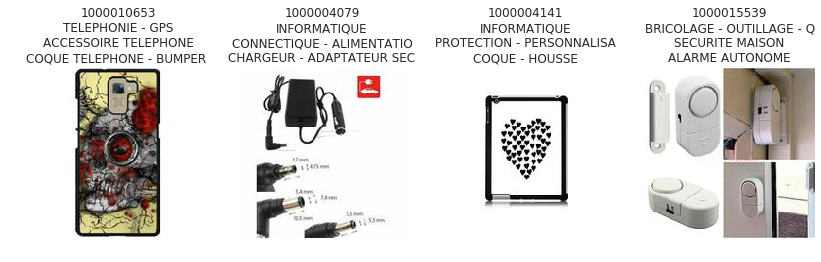

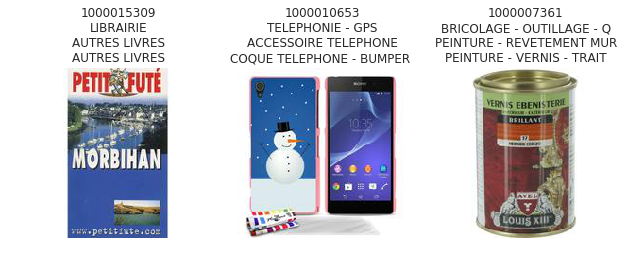

In [9]:
max_counter = 15
counter = 0
n = 4
for item in TRAIN_DB:
    if counter % n == 0:
        plt.figure(figsize=(14, 6))
    
    mask = CATEGORY_NAMES_DF['category_id'] == item['category_id']
    plt.subplot(1, n, counter % n + 1)
    cat_levels = CATEGORY_NAMES_DF[mask][level_tags].values.tolist()[0]
    cat_levels = [c[:25] for c in cat_levels]
    title = str(item['category_id']) + '\n'
    title += '\n'.join(cat_levels)
    plt.title(title)
    plt.imshow(decode_images(item['imgs']))
    plt.axis('off')
    
    counter += 1
    if counter == max_counter:
        break

In [10]:
for item in TEST_DB:
    break
print(type(item), list(item.keys()))
print(item['_id'], len(item['imgs']))

<class 'dict'> ['imgs', '_id']
10 3


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


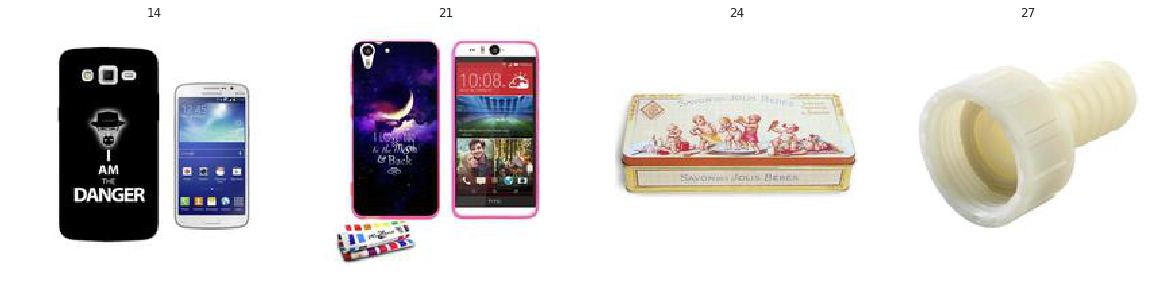

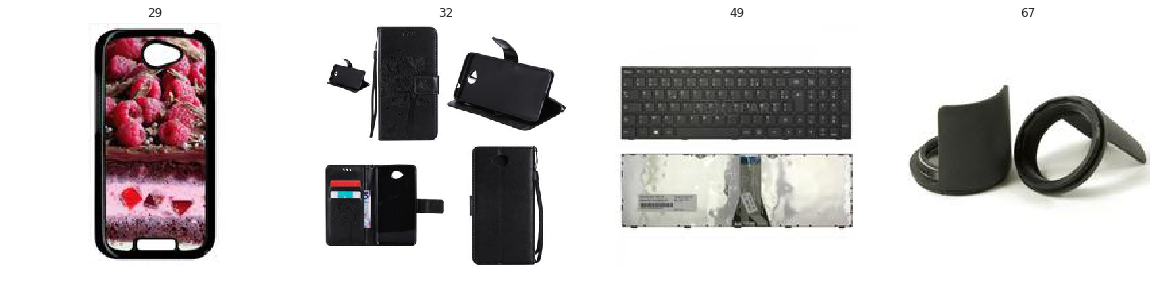

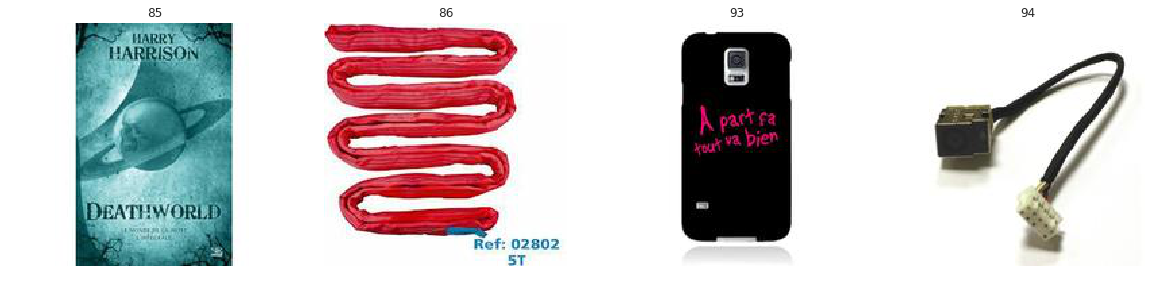

In [11]:
max_counter = 15
counter = 0
n = 4
for item in TEST_DB:
    if counter % n == 0:
        plt.figure(figsize=(20, 20))
        
    plt.subplot(1, n, counter % n + 1)
    title = str(item['_id'])
    plt.title(title)
    plt.imshow(decode_images(item['imgs']))
    plt.axis('off')
    
    counter += 1
    if counter == max_counter:
        break

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


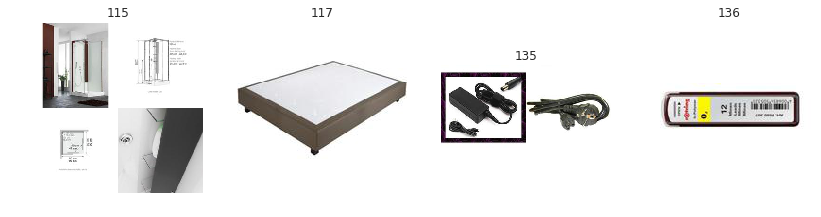

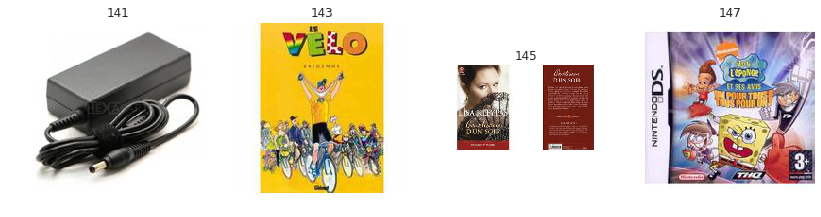

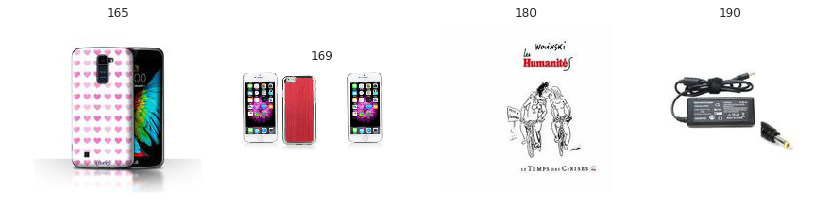

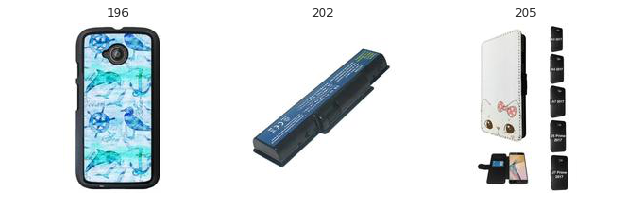

In [12]:
max_counter = 15
counter = 0
n = 4
for item in TEST_DB:
    if counter % n == 0:
        plt.figure(figsize=(14, 6))
        
    plt.subplot(1, n, counter % n + 1)
    title = str(item['_id'])
    plt.title(title)
    plt.imshow(decode_images(item['imgs']))
    plt.axis('off')
    
    counter += 1
    if counter == max_counter:
        break

### Random item access

In [13]:
import struct
from tqdm import tqdm_notebook

num_dicts = 7069896
length_size = 4
IDS_MAPPING = {}

with open(os.path.join(INPUT_PATH, 'train.bson'), 'rb') as f, tqdm_notebook(total=num_dicts) as bar:
    item_data = []
    offset = 0
    while True:
        bar.update()
        f.seek(offset)
        
        item_length_bytes = f.read(length_size)
        if len(item_length_bytes) == 0:
            break
            
        length = struct.unpack('<i', item_length_bytes)[0]
        
        f.seek(offset)
        item_data = f.read(length)
        assert len(item_data) == length, "%i vs %i" % (len(item_data), length)
        
        #check if we can decode
        item = bson.BSON.decode(item_data)
        
        IDS_MAPPING[item['_id']] = (offset, length)
        offset += length
        


### Display for example a item with _id=1234

In [14]:
def get_item(item_id):
    assert item_id in IDS_MAPPING
    with open(os.path.join(INPUT_PATH, 'train.bson'), 'rb') as f:
        offset, length = IDS_MAPPING[item_id]
        f.seek(offset)
        item_data = f.read(length)
        return bson.BSON.decode(item_data)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


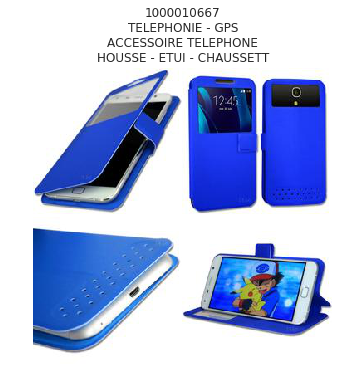

In [15]:
item = get_item(1234)

mask = CATEGORY_NAMES_DF['category_id'] == item['category_id']
cat_levels = CATEGORY_NAMES_DF[mask][level_tags].values.tolist()[0]
cat_levels = [c[:25] for c in cat_levels]
title = str(item['category_id']) + '\n'
title += '\n'.join(cat_levels)
plt.title(title)
plt.imshow(decode_images(item['imgs']))
_ = plt.axis('off')

### Explore categories

In [16]:
print('Unique categories: ', len(CATEGORY_NAMES_DF['category_id'].unique()))
print('Unique level 1 categories: ', len(CATEGORY_NAMES_DF['category_level1'].unique()))
print('Unique level 2 categories: ', len(CATEGORY_NAMES_DF['category_level2'].unique()))
print('Unique level 3 categories: ', len(CATEGORY_NAMES_DF['category_level3'].unique()))

Unique categories:  5270
Unique level 1 categories:  49
Unique level 2 categories:  483
Unique level 3 categories:  5263


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


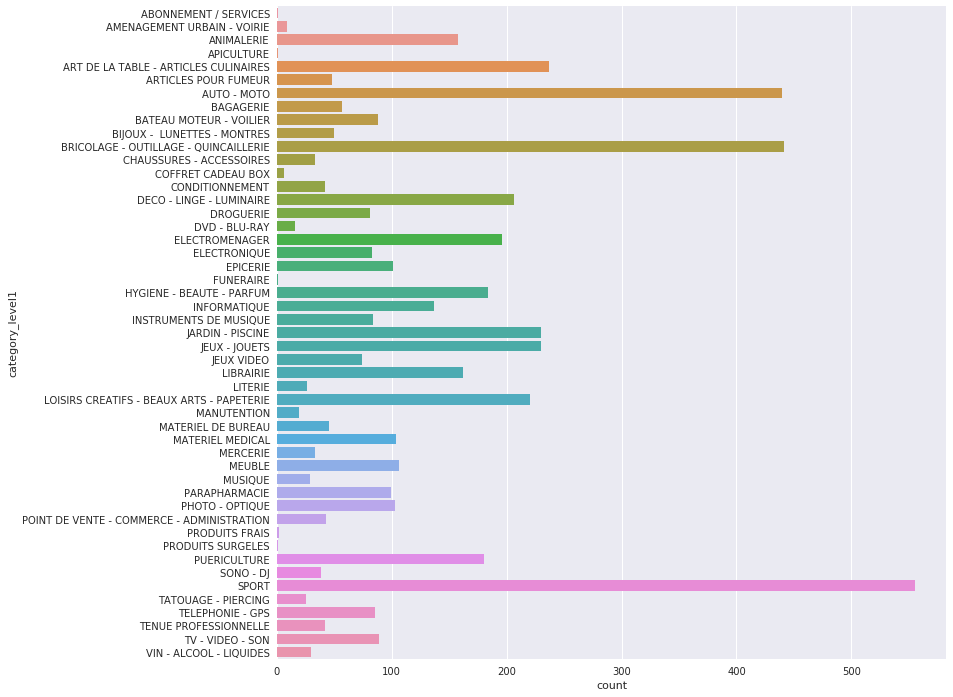

In [17]:
plt.figure(figsize=(12, 12))
sns.countplot(y=CATEGORY_NAMES_DF['category_level1'])

In [18]:
cat_level2_counts = CATEGORY_NAMES_DF.groupby('category_level2')['category_level2'].count()
print(cat_level2_counts.describe())
print('Level 2 the most frequent category: ', cat_level2_counts.argmax())

count    483.000000
mean      10.910973
std       13.035315
min        1.000000
25%        4.000000
50%        8.000000
75%       13.000000
max      187.000000
Name: category_level2, dtype: float64
Level 2 the most frequent category:  PIECES


In [19]:
cat_level3_counts = CATEGORY_NAMES_DF.groupby('category_level3')['category_level3'].count()
print(cat_level3_counts.describe())
print('Level 3 the most frequent category: ', cat_level3_counts.argmax())

count    5263.000000
mean        1.001330
std         0.036449
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: category_level3, dtype: float64
Level 3 the most frequent category:  CONFORT URINAIRE


### create training data table _id, category_id

In [20]:
from tqdm import tqdm_notebook

num_dicts = 7069896
prod_to_category = [None] * num_dicts

with tqdm_notebook(total=num_dicts) as bar:
    TRAIN_DB = bson.decode_file_iter(open(os.path.join(INPUT_PATH, 'train.bson'), 'rb'))
    for i, item in enumerate(TRAIN_DB):
        bar.update()
        prod_to_category[i] = (item['_id'], item['category_id'])

In [21]:
TRAIN_CATEGORIES_DF = pd.DataFrame(prod_to_category, columns=['_id', 'category_id'])
TRAIN_CATEGORIES_DF.head()

_id  category_id
0    0   1000010653
1    1   1000010653
2    2   1000004079
3    3   1000004141
4    4   1000015539

In [22]:
print("Unique categories: %i in %i entries" %(len(TRAIN_CATEGORIES_DF['category_id'].unique()), len(TRAIN_CATEGORIES_DF)))

Unique categories: 5270 in 7069896 entries


In [23]:
train_categories_gb = TRAIN_CATEGORIES_DF.groupby('category_id')
train_categories_count = train_categories_gb['category_id'].count()
print(train_categories_count.describe())

count     5270.000000
mean      1341.536243
std       4941.011223
min         12.000000
25%         69.000000
50%        200.000000
75%        718.500000
max      79640.000000
Name: category_id, dtype: float64


In [24]:
most_freq_cats = train_categories_count[train_categories_count == train_categories_count.max()]
less_freq_cats = train_categories_count[train_categories_count == train_categories_count.min()]

In [25]:
print("Most frequent category: ", CATEGORY_NAMES_DF[CATEGORY_NAMES_DF['category_id'].isin(most_freq_cats.index)].values)
print("Less frequent category: ", CATEGORY_NAMES_DF[CATEGORY_NAMES_DF['category_id'].isin(less_freq_cats.index)].values)

Most frequent category:  [[1000018296 'MUSIQUE' 'CD' 'CD POP ROCK - CD ROCK INDE']]
Less frequent category:  [[1000017266 'APICULTURE' "OUTILS DE L'APICULTEUR"
  'CHASSE-ABEILLES - PIEGE INSECTES - BOUCHON PIEGE']
 [1000022465 'BATEAU MOTEUR - VOILIER' 'ELECTRICITE'
  'CONVERTISSEUR DE TENSION']
 [1000017559 'BATEAU MOTEUR - VOILIER'
  'PIECE MOTEUR DE BATEAU - PIECE MOTEUR DE HORS BORD'
  'ECHAPEMENT - VENTILATION']
 [1000015609 'CHAUSSURES - ACCESSOIRES' 'ACCESSOIRES CHAUSSURES'
  'ESSUIE-BOTTES - LAVE-BOTTES']
 [1000008633 'CONDITIONNEMENT' 'CALAGE - PROTECTION' 'COUSSIN GONFLABLE']
 [1000012168 'DROGUERIE' 'COMBUSTIBLE' 'CHARBON DE BOIS']
 [1000012287 'DROGUERIE' "MATERIEL D'ENTRETIEN" 'PINCE A DECHETS']
 [1000003589 'ELECTROMENAGER' 'ENTRETIEN DES SOLS - MAISON' 'CIREUSE']
 [1000013297 'ELECTRONIQUE' 'CAPTEURS' 'SYSTEME DE SURVEILLANCE DE NIVEAU']
 [1000000896 'EPICERIE' 'CONSERVE DE LEGUME' 'POIVRON EN CONSERVE']
 [1000016613 'HYGIENE - BEAUTE - PARFUM' 'CAPILLAIRE'
  'PASSE A ME

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


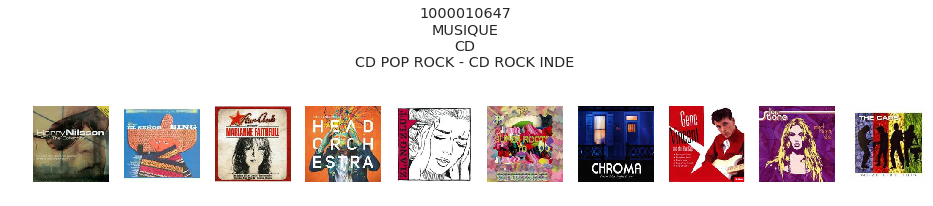

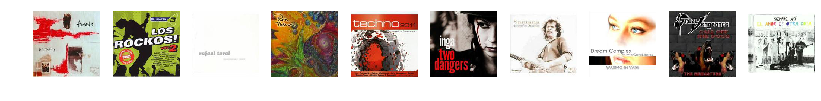

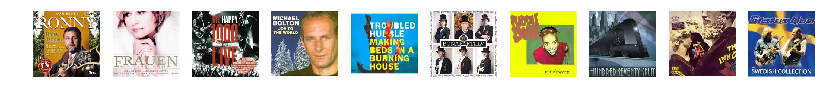

In [26]:
most_freq_cat = most_freq_cats.index[0]

plt.figure(figsize=(16, 4))
mask = CATEGORY_NAMES_DF['category_id'] == most_freq_cat
cat_levels = CATEGORY_NAMES_DF[mask][level_tags].values.tolist()[0]
title = str(item['category_id']) + '\n'
title += '\n'.join(cat_levels)
plt.suptitle(title)

most_freq_cat_ids = train_categories_gb.get_group(most_freq_cat)['_id']
max_counter = 50
counter = 0
n = 10
for item_id in most_freq_cat_ids.values[:max_counter]:
    if counter > 0 and counter % n==0:
        plt.figure(figsize=(14, 6))
        
    item = get_item(item_id)
    
    mask = CATEGORY_NAMES_DF['category_id'] == item['category_id']
    plt.subplot(1, n, counter % n + 1)
    plt.imshow(decode_images(item['imgs']))
    plt.axis('off')
    
    counter += 1
    if counter == max_counter:
        break

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


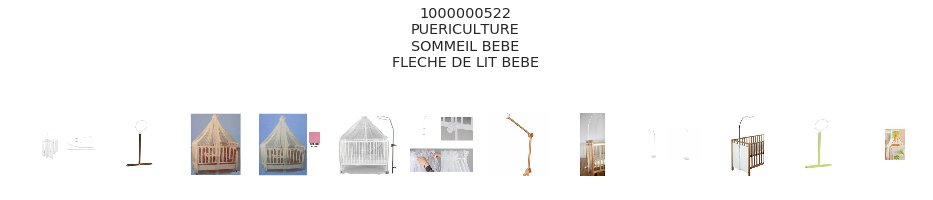

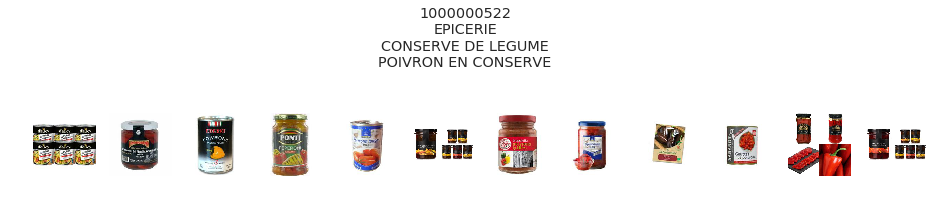

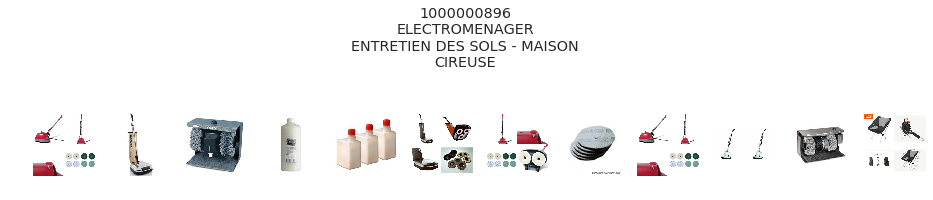

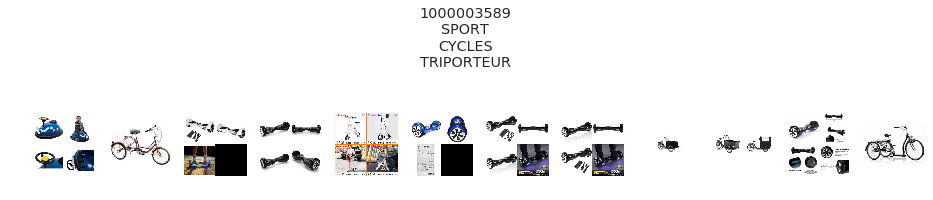

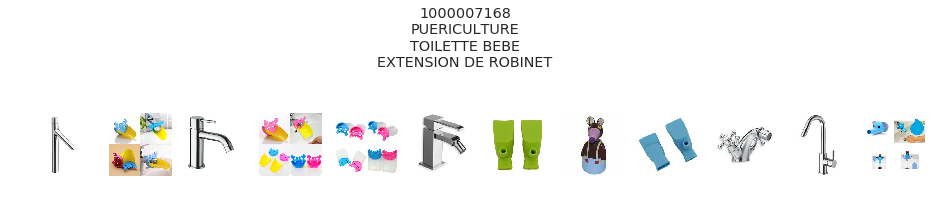

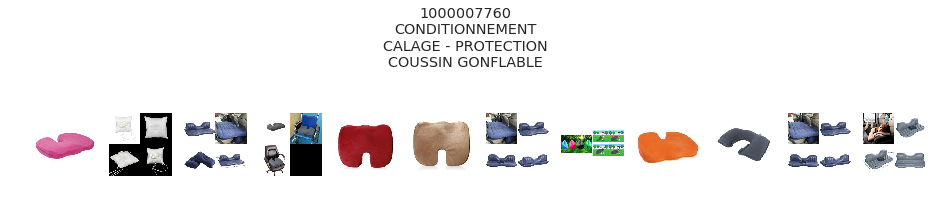

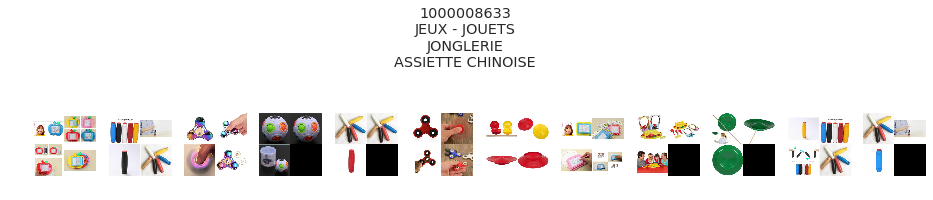

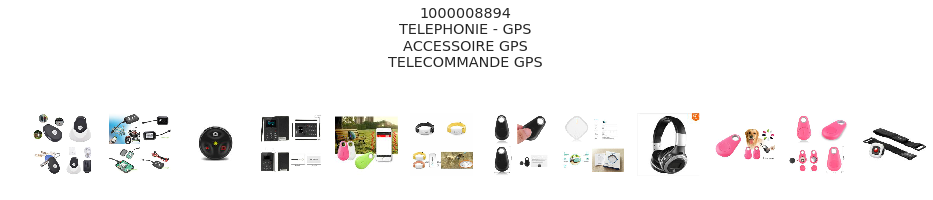

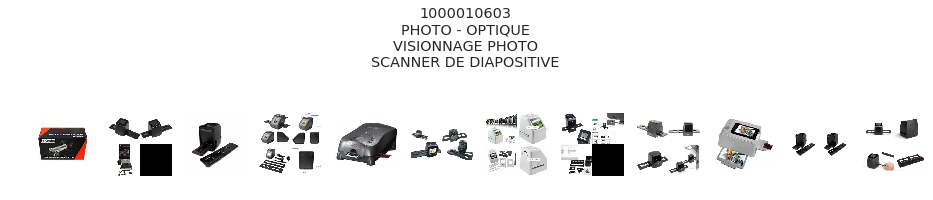

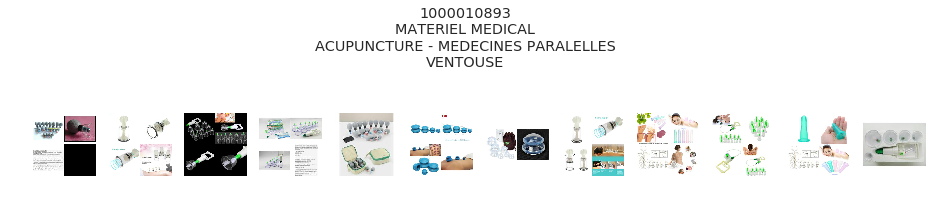

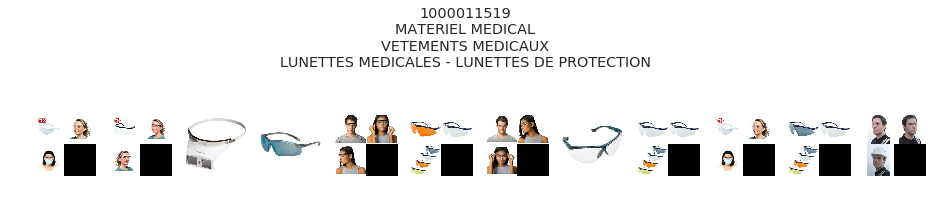

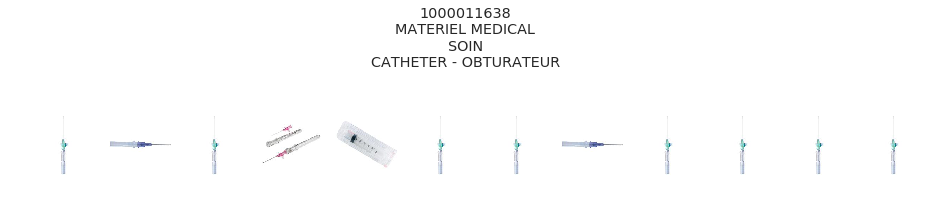

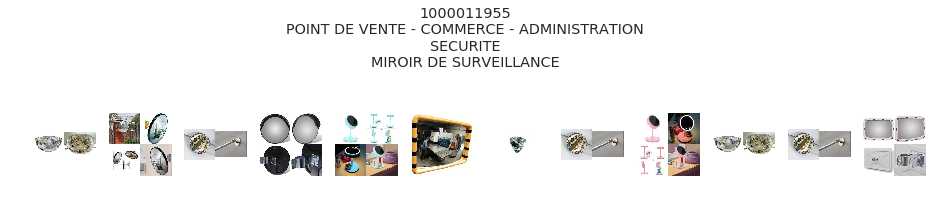

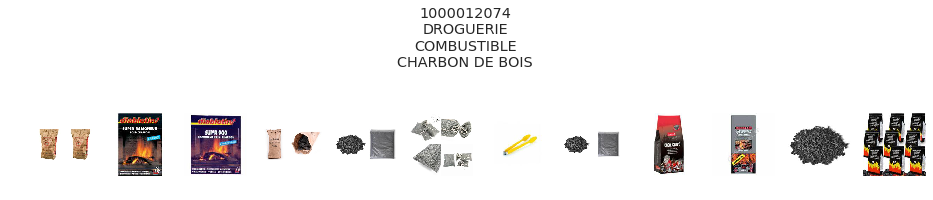

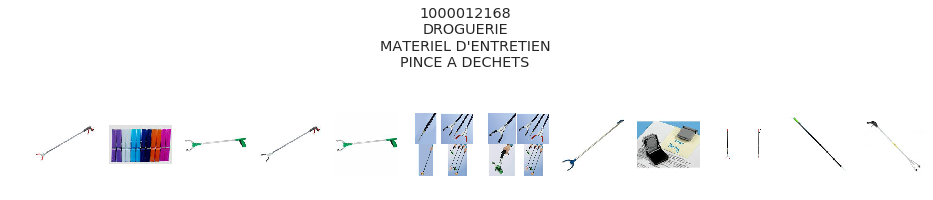

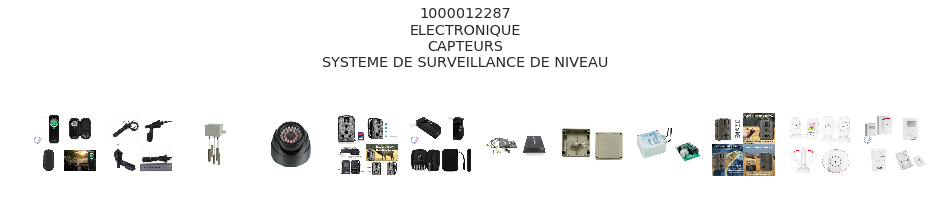

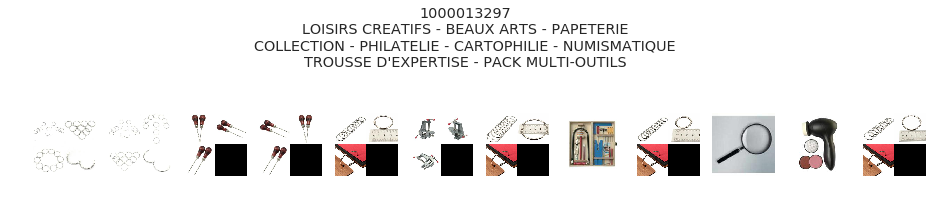

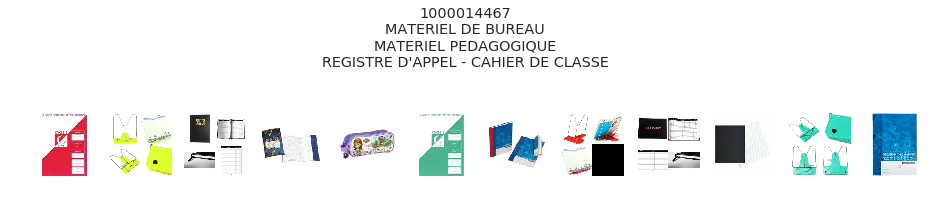

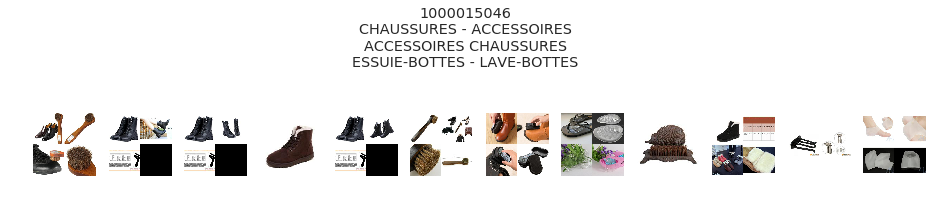

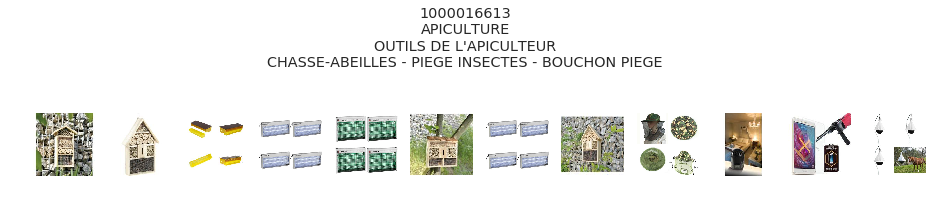

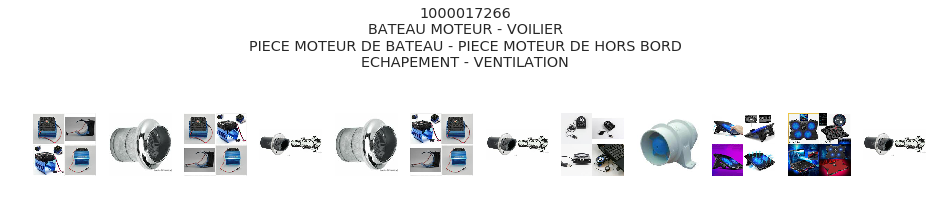

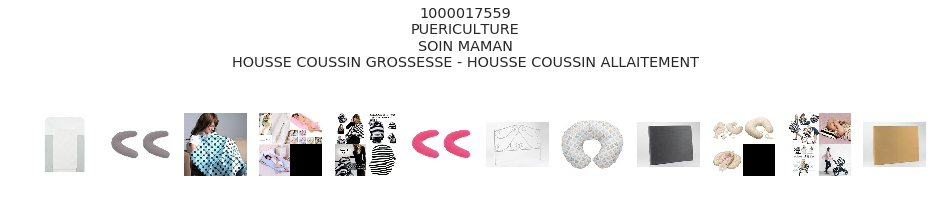

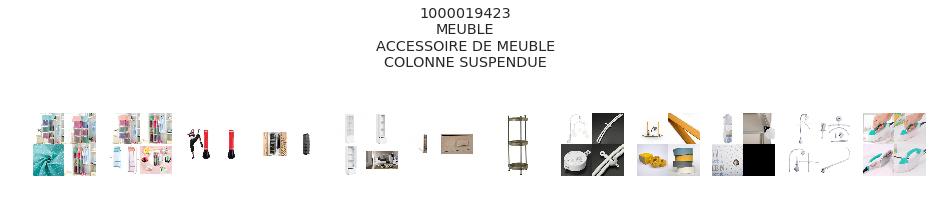

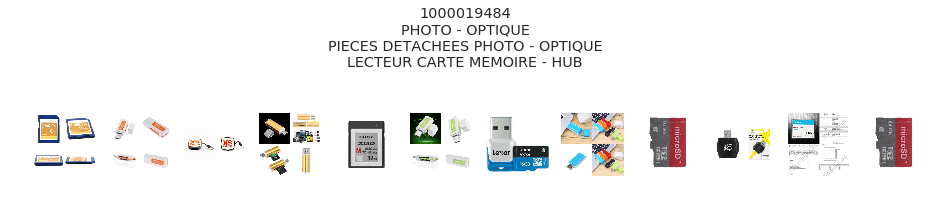

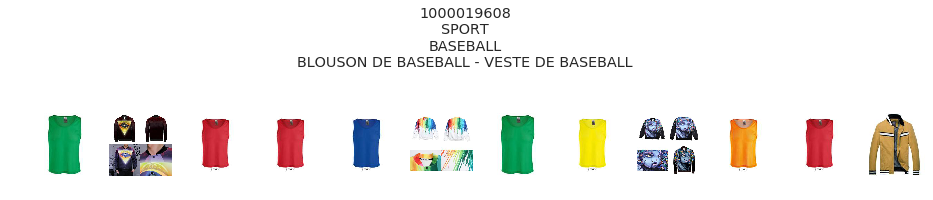

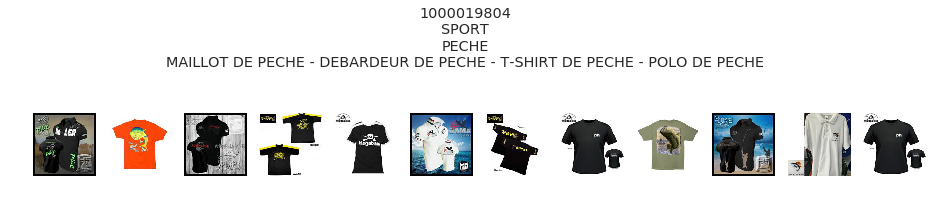

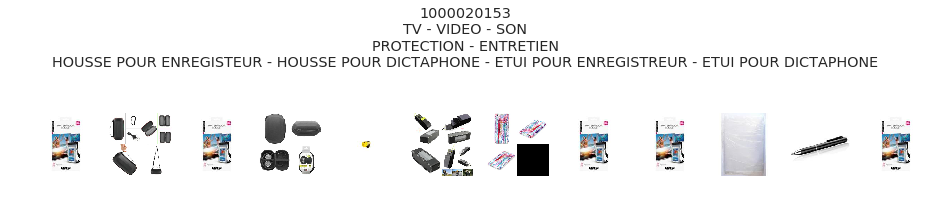

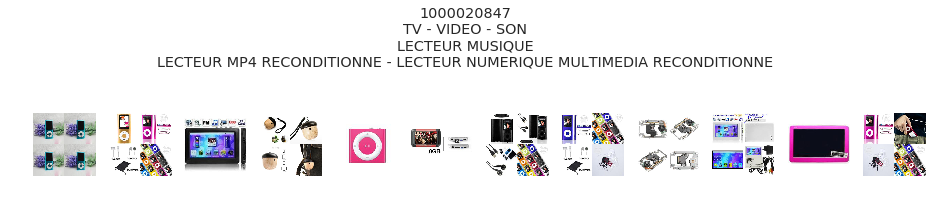

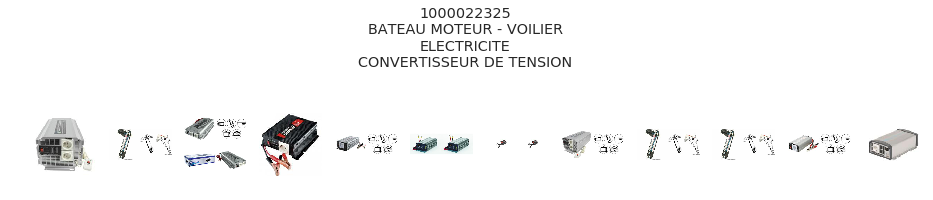

In [28]:
for less_freq_cat in less_freq_cats.index:
    less_freq_cat_ids = train_categories_gb.get_group(less_freq_cat)['_id']
    counter = 0
    n = 12
    
    plt.figure(figsize=(16, 4))
    mask = CATEGORY_NAMES_DF['category_id'] == less_freq_cat
    cat_levels = CATEGORY_NAMES_DF[mask][level_tags].values.tolist()[0]
    title = str(item['category_id']) + '\n'
    title += '\n'.join(cat_levels)
    plt.suptitle(title)
    
    for item_id in less_freq_cat_ids.values:
        if counter > 0 and counter % n == 0:
            plt.figure(figsize=(16, 4))
            
        item = get_item(item_id)
        
        mask = CATEGORY_NAMES_DF['category_id'] == item['category_id']
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(decode_images(item['imgs']))
        plt.axis('off')
        
        counter += 1

In [29]:
IDS_MAPPING

{0: (0, 6979),
 1: (6979, 7318),
 2: (14297, 5455),
 3: (19752, 4580),
 4: (24332, 6346),
 5: (30678, 3711),
 6: (34389, 4891),
 7: (39280, 4884),
 8: (44164, 5565),
 9: (49729, 7461),
 11: (57190, 8780),
 12: (65970, 5854),
 13: (71824, 15914),
 16777230: (45777868621, 15787),
 15: (87738, 6969),
 16: (94707, 7078),
 17: (101785, 6367),
 18: (108152, 10672),
 19: (118824, 10942),
 20: (129766, 4857),
 22: (134623, 1727),
 25: (136350, 17796),
 26: (154146, 13648),
 19573423: (52697268352, 1515),
 28: (167794, 4595),
 16777245: (45777892578, 4091),
 30: (172389, 9312),
 31: (181701, 7867),
 33: (189568, 9416),
 34: (198984, 6366),
 35: (205350, 7922),
 36: (213272, 8008),
 37: (221280, 6813),
 38: (228093, 6881),
 39: (234974, 7811),
 40: (242785, 5390),
 41: (248175, 7174),
 42: (255349, 9963),
 43: (265312, 9591),
 44: (274903, 6669),
 45: (281572, 5892),
 46: (287464, 4041),
 47: (291505, 6059),
 48: (297564, 4761),
 50: (302325, 4215),
 51: (306540, 9415),
 52: (315955, 8044),
 53: